In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

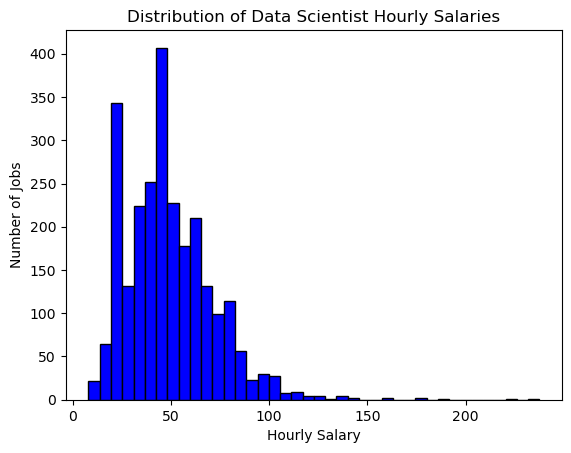

In [6]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()
df_DS = df_DS.dropna(subset=['salary_hour_avg'])

df_DS['salary_hour_avg'].plot(
    kind='hist',
    bins=40,
    color='blue',
    edgecolor='black'
)
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Scientist Hourly Salaries')
plt.show()

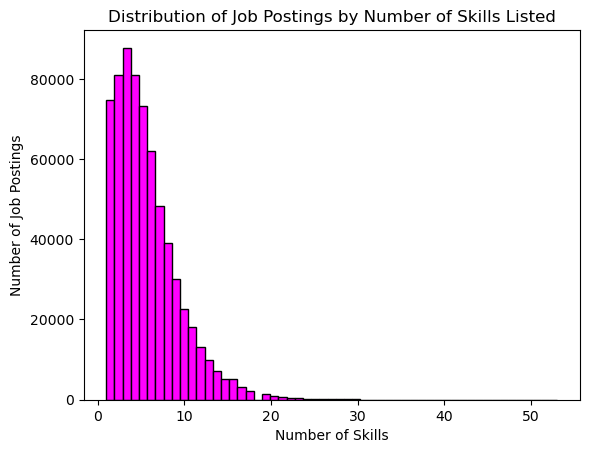

In [8]:
df_skills = df.dropna(subset='job_skills').copy()
df_skills['skill_num'] = df_skills['job_skills'].apply(len)

df_skills['skill_num'].plot(
    kind='hist',
    bins=55,
    color='magenta',
    edgecolor='black'
)

plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.show()

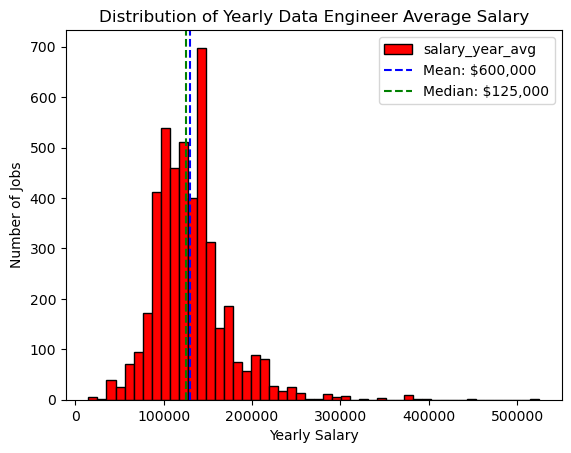

In [16]:
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()
df_DE.dropna(subset='salary_year_avg', inplace=True)

df_DE['salary_year_avg'].plot(
    kind = 'hist',
    bins = 50,
    color = 'r',
    edgecolor = 'black'
)

mean_salary = df_DE['salary_year_avg'].mean()
median_salary = df_DE['salary_year_avg'].median()

plt.axvline(mean_salary, color='b', linestyle='--', label=f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='g', linestyle='--', label=f'Median: ${median_salary:,.0f}')
plt.legend()
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Yearly Data Engineer Average Salary')
plt.show()